In [1]:
import numpy as np
import pandas as pd

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC

In [2]:
# load PR Newswire Annotated Dataset
pr_newswire = pd.read_csv("../data/pr-newswire.csv")

In [3]:
raw_news_stories = pr_newswire["data"]

# Establish data and target for vectorization
stories = raw_news_stories
classifications = list(pr_newswire["target"])

In [4]:
# Build Vectorizer
tfidf_v = TfidfVectorizer()
vectorized = tfidf_v.fit_transform(stories)

In [5]:
# Train/test split
x_train, x_test, y_train, y_test = train_test_split(
    vectorized, classifications, test_size=0.20
)

In [6]:
# Build LabelEncoder for training
label_encoder = LabelEncoder()
label_encoder.fit(y_train)

# Encode training lables
y_train_labels = label_encoder.transform(np.asarray(y_train))

In [7]:
# Fit SVM "rbf" Kernral
rbf_svm = SVC(kernel="rbf")
rbf_svm.fit(x_train, y_train)

SVC()

In [8]:
y_pred = rbf_svm.predict(x_test)

In [9]:
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    f1_score,
    recall_score,
    precision_score,
)

In [10]:
c_matrix = confusion_matrix(y_test, y_pred)

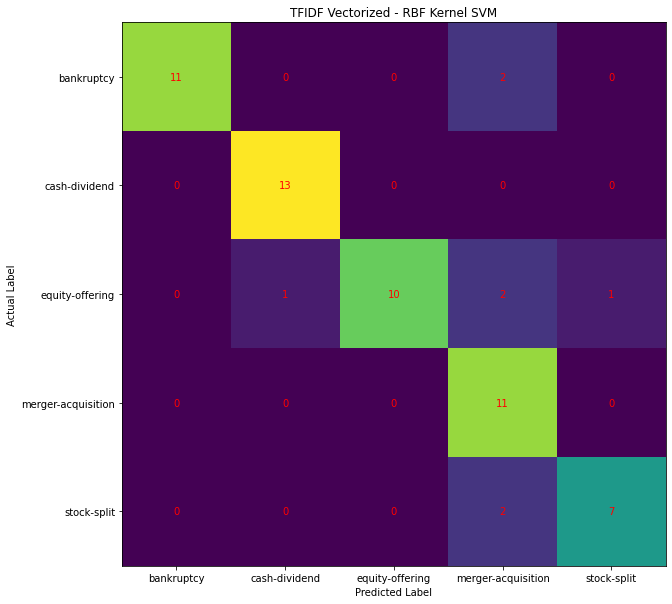

In [11]:
import matplotlib.pyplot as plt

# Plot confusion matrix
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(c_matrix)

ax.set_ylabel("Actual Label")
ax.set_xlabel("Predicted Label")
labels = tuple(label_encoder.inverse_transform([0, 1, 2, 3, 4]))
ax.xaxis.set(ticks=(0, 1, 2, 3, 4), ticklabels=labels)
ax.yaxis.set(ticks=(0, 1, 2, 3, 4), ticklabels=labels)
plt.title("TFIDF Vectorized - RBF Kernel SVM")
for i in range(len(labels)):  # ref: (https://realpython.com/logistic-regression-python/)
    for j in range(len(labels)):
        ax.text(j, i, c_matrix[i, j], ha='center', va='center', color='red')
plt.savefig("tfidf-vectorized-rbf-kernel-svm")

In [12]:
# Calculate key metrics
precision = precision_score(y_test, y_pred, average="weighted")
recall = recall_score(y_test, y_pred, average="weighted")
f1 = f1_score(y_test, y_pred, average="weighted")

print(f"Precision Score: {precision}")
print(f"Recall Score: {recall}")
print(f"F1 Score: {f1}")

Precision Score: 0.9010679271708683
Recall Score: 0.8666666666666667
F1 Score: 0.8692745616765225


In [13]:
# Classification Report
print(classification_report(y_test, y_pred))

                    precision    recall  f1-score   support

        bankruptcy       1.00      0.85      0.92        13
     cash-dividend       0.93      1.00      0.96        13
   equity-offering       1.00      0.71      0.83        14
merger-acquisition       0.65      1.00      0.79        11
       stock-split       0.88      0.78      0.82         9

          accuracy                           0.87        60
         macro avg       0.89      0.87      0.86        60
      weighted avg       0.90      0.87      0.87        60



In [14]:
from sklearn.decomposition import TruncatedSVD

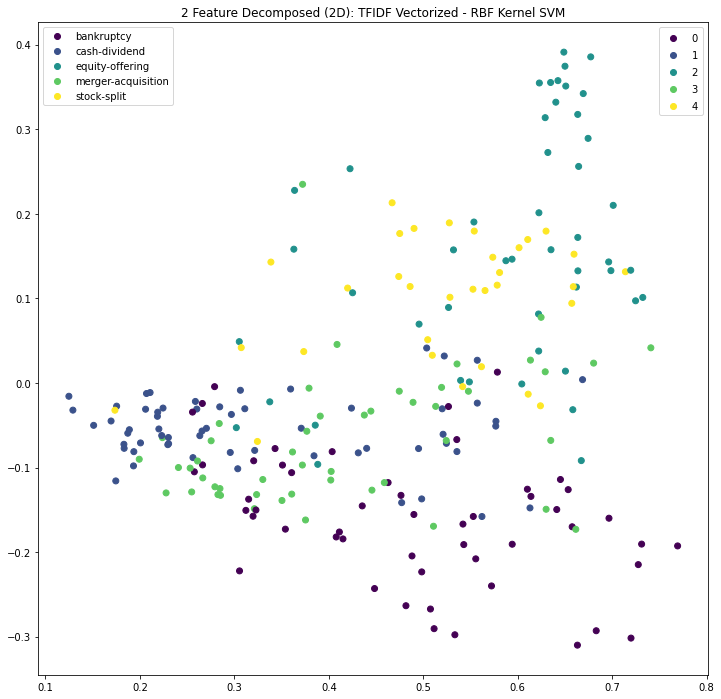

In [15]:
# Decompose sparse matrix
tsvd = TruncatedSVD()
x_decomposed = tsvd.fit_transform(x_train)

# Make dimensions
x = x_decomposed[:, 0]
y = x_decomposed[:, 1]

# 2D Plot
fig2d = plt.figure(figsize=(12, 12))

ax = plt.axes()
scatter = plt.scatter(x, y, c=label_encoder.transform(y_train))

# Build Legend
legend = ax.legend(*scatter.legend_elements())
ax.add_artist(legend)
handles, labels = scatter.legend_elements()
ax.legend(
    handles,
    label_encoder.inverse_transform([int(as_int[-3]) for as_int in labels]),
    loc=2
)

# Show Plot
plt.title("2 Feature Decomposed (2D): TFIDF Vectorized - RBF Kernel SVM")
plt.show()
fig2d.savefig("tfidf-vectorized-rbf-kernel-svm-2d-scatter")

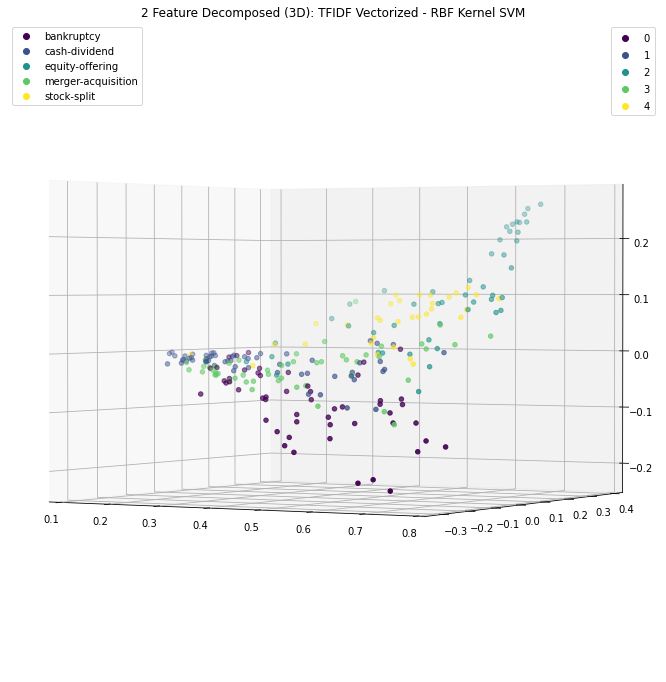

In [16]:
# Make 3 dimensions
x = x_decomposed[:, 0]
y = x_decomposed[:, 1]
z = x**1 * y**1

# 3D Plot
fig3d = plt.figure(figsize=(12, 12))

ax = plt.axes(projection ="3d")
ax.view_init(1)
ax.scatter3D(x, y, z, c=label_encoder.transform(y_train))

# Build Legend
legend_elements = ax.legend(*scatter.legend_elements())
ax.add_artist(legend_elements)
handles, labels = scatter.legend_elements()
ax.legend(
    handles,
    label_encoder.inverse_transform([int(as_int[-3]) for as_int in labels]),
    loc=2
)

# Show Plot
plt.title("2 Feature Decomposed (3D): TFIDF Vectorized - RBF Kernel SVM")
plt.show()
fig3d.savefig("tfidf-vectorized-rbf-kernel-svm-3d-scatter")